In [ ]:
import pandas as pd
import numpy as np

df_datos_abc=pd.read_csv("hr_raw_data.csv", index_col=0) 

pd.set_option('display.max_columns', None)
pd.set_option("display.expand_frame_repr", False)

df_morado = df_datos_abc[['employeenumber','over18', 'overtime', 'percentsalaryhike', 'performancerating','relationshipsatisfaction', 
                          'standardhours', 'stockoptionlevel','totalworkingyears', 'trainingtimeslastyear', 'worklifebalance']]
df_morado.head()

,employeenumber,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance
0,1,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0"
1,2,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0"
2,3,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN
3,4,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN
4,5,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0"


# Next Steps 
# Ejecutar Funciones ⬇️

In [2]:
# borrar 'over 18'
df_datos_abc.drop(columns=["over18"], inplace=True)

# borrar 'totalworkingyears'
df_datos_abc.drop(columns=["totalworkingyears"], inplace=True)

# worklifebalance cambiar de objeto a numeric  
df_datos_abc["worklifebalance"] = pd.to_numeric(df_datos_abc["worklifebalance"], errors="coerce")
converted_type = df_datos_abc["worklifebalance"].dtype
converted_type

# performancerating cambiar de objeto a numeric  
df_datos_abc["performancerating"] = pd.to_numeric(df_datos_abc["performancerating"], errors="coerce")
converted = df_datos_abc["performancerating"].dtype
converted

df_datos_abc
df_datos_abc["worklifebalance"].dtype
df_datos_abc['performancerating'].dtype

dtype('float64')

In [ ]:
# gestionar nulos de standardhours (20,92%)
# Valores não nulos:
# "Part Time": 927
# "Full Time": 400
# Valores nulos: 351 (o que representa 20,92% do total)
# Tenemos 80% not null
# Tipo da coluna: object (texto)

df_datos_abc['standardhours'] = df_datos_abc['standardhours'].fillna("Unknown")

In [4]:
# gestionar nulos de overtime(41.48%)
""" overtime
No     42.6
NaN    41.5
Yes    16.0 """
# Cambiar 41.5 a si o no influenciaria en el resultado por eso mantener Unknown

df_datos_abc['overtime'] = df_datos_abc['overtime'].fillna("Unknown")


# Filtrado ⬇️

# Performancerating

In [ ]:
# Que job roles estan en PT y FT y con cual rating?
df_percent = (df_datos_abc.groupby(['jobrole', 'standardhours'])['performancerating'].value_counts(normalize=True, dropna=False).mul(100).round(2).reset_index(name='percentage'))
df_percent

,jobrole,standardhours,performancerating,percentage
0,HEALTHcarE rePResENTATIVe,Full Time,NaN,100.0
1,HEALThCARe REPReSENTatIvE,Unknown,NaN,100.0
2,HEALThCaRe rePResEnTaTivE,Unknown,NaN,100.0
3,HEALThcaRe RePresENtaTiVE,Full Time,NaN,100.0
4,HEALtHcAre rEPrESENtative,Part Time,NaN,100.0
...,...,...,...,...
1590,sales executiVE,Part Time,NaN,100.0
1591,sales rEpRESEnTatIve,Full Time,NaN,100.0
1592,sales rEpResENtAtIVe,Part Time,NaN,100.0
1593,sales rEprESEntAtIvE,Part Time,NaN,100.0


In [22]:
# Que jobs estan en Nan de performancerating? 
# 'Research Director', 'Manager', 'Sales Executive','Manufacturing Director', 'Research Scientist','Healthcare Representative', 'Laboratory Technician',
# 'Sales Representative', 'Human Resources']

df_datos_abc['jobrole_clean'] = df_datos_abc['jobrole'].str.strip().str.title()

# es necesario limpiar primero jobs:
df_nan_jobs = df_datos_abc[df_datos_abc['performancerating'].isna()]

# unicos job roles con NaN
df_nan_jobs['jobrole_clean'].unique()


array(['Research Director', 'Manager', 'Sales Executive',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Laboratory Technician',
       'Sales Representative', 'Human Resources'], dtype=object)

In [41]:
# Promedio de 'jobsatisfaction' para los cargos que tienen performancerating como NaN
# Filtrar solo los registros con performancerating ausente
df_nan_jobs = df_datos_abc[df_datos_abc['performancerating'].isna()].copy()
df_nan_jobs

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework,jobrole_clean,overtime_flag
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,No,13,NaN,3,Full Time,0,5,NaN,20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes,Research Director,False
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,Unknown,14,NaN,1,Unknown,1,5,NaN,33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1,Manager,False
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,No,11,NaN,4,Unknown,0,3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1,Manager,False
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Unknown,19,NaN,2,Full Time,2,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False,Research Director,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,No,12,NaN,4,Unknown,1,5,NaN,19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0,Sales Executive,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,No,NaN,488.944444,NaN,-26,3,Medical,1,824,2,1,NaN,4,1,rESEaRcH SciEnTiST,3,Single,"3949,17$","10267,83$",4,Unknown,12,NaN,4,Unknown,0,2,NaN,3,NaN,1,2,"3949,17$",1980,NaN,NaN,NaN,Yes,Research Scientist,False
1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1,1087,4,1,NaN,3,5,mANager,3,Married,"15943,72$","41453,67$",3,No,11,NaN,3,Full Time,1,2,NaN,5,NaN,1,0,"15943,72$",1976,"191324,62$",NaN,NaN,False,Manager,False
1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,1,528,3,0,NaN,3,1,reSearch sCienTiSt,4,NaN,NaN,"6090,75$",1,No,19,NaN,1,Part Time,0,1,NaN,6,NaN,1,5,NaN,1994,"28111,13$",NaN,NaN,False,Research Scientist,False
1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,3,1,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,Yes,12,NaN,3,Part Time,1,4,NaN,22,NaN,14,10,"8339,32$",1976,"100071,84$",NaN,NaN,Yes,Manufacturing Director,True


In [44]:
# Calcular promedio de satisfacción laboral por cargo dentro de los NaN
media_satisfaccion_nan = df_nan_jobs.groupby('jobrole_clean')['jobsatisfaction'].mean().round(2)
# Promedio de 'jobsatisfaction' por tipo de cargo ('jobrole_clean')
media_satisfaccion_por_cargo = df_datos_abc.groupby('jobrole_clean')['jobsatisfaction'].mean().round(2)
# Promedio de 'jobsatisfaction' por tipo de jornada ('standardhours': Full Time / Part Time)
media_satisfaccion_por_jornada = df_datos_abc.groupby('standardhours')['jobsatisfaction'].mean().round(2)


In [45]:
# Mostrar resultados
print("🔹 Promedio de jobsatisfaction por cargo:\n", media_satisfaccion_por_cargo)
print("\n🔹 Promedio de jobsatisfaction por tipo de jornada (PT vs FT):\n", media_satisfaccion_por_jornada)
print("\n🔹 Promedio de jobsatisfaction en cargos con performancerating ausente (NaN):\n", media_satisfaccion_nan)


🔹 Promedio de jobsatisfaction por cargo:
 jobrole_clean
Healthcare Representative    2.85
Human Resources              2.59
Laboratory Technician        2.71
Manager                      2.63
Manufacturing Director       2.65
Research Director            2.69
Research Scientist           2.79
Sales Executive              2.80
Sales Representative         2.76
Name: jobsatisfaction, dtype: float64

🔹 Promedio de jobsatisfaction por tipo de jornada (PT vs FT):
 standardhours
Full Time    2.76
Part Time    2.74
Unknown      2.73
Name: jobsatisfaction, dtype: float64

🔹 Promedio de jobsatisfaction en cargos con performancerating ausente (NaN):
 jobrole_clean
Healthcare Representative    2.85
Human Resources              2.59
Laboratory Technician        2.71
Manager                      2.63
Manufacturing Director       2.65
Research Director            2.69
Research Scientist           2.79
Sales Executive              2.80
Sales Representative         2.76
Name: jobsatisfaction, dtype: f

In [25]:
df_percent = (df_datos_abc.groupby(['jobrole_clean', 'standardhours'])['performancerating'].value_counts(normalize=True, dropna=False).mul(100).round(2).reset_index(name='percentage'))
df_percent


,jobrole_clean,standardhours,performancerating,percentage
0,Healthcare Representative,Full Time,NaN,100.0
1,Healthcare Representative,Part Time,NaN,100.0
2,Healthcare Representative,Unknown,NaN,100.0
3,Human Resources,Full Time,NaN,100.0
4,Human Resources,Part Time,NaN,100.0
5,Human Resources,Unknown,NaN,100.0
6,Laboratory Technician,Full Time,NaN,100.0
7,Laboratory Technician,Part Time,NaN,100.0
8,Laboratory Technician,Unknown,NaN,100.0
9,Manager,Full Time,NaN,100.0


# Exploracion de datos

# Traininglastyear con Enviromental Satisfaction

In [ ]:
# No hay relacion
grouped_training_salary = df_datos_abc.groupby("trainingtimeslastyear")["environmentsatisfaction"].mean().round(2)
grouped_training_salary

trainingtimeslastyear
0    4.44
1    3.67
2    4.41
3    4.55
4    3.64
5    3.58
6    3.89
Name: environmentsatisfaction, dtype: float64

# Traininglast years sin relacion con aumento de sueldo

In [ ]:
# trainingtimeslastyear + aumento sueldo 
# Hay relacion? NO

# Visualmente, parece que no hay una diferencia significativa.
# Los valores están todos alrededor del 15 %, con una variación muy pequeña (máximo de 0,19 puntos porcentuales).
grouped_training_salary = df_datos_abc.groupby("trainingtimeslastyear")["percentsalaryhike"].mean().round(2)
grouped_training_salary

trainingtimeslastyear
0    15.08
1    15.12
2    15.15
3    15.22
4    15.03
5    15.14
6    15.06
Name: percentsalaryhike, dtype: float64

# Relacion de Satisfaccion por PT y FT

In [28]:
# Comparar média de anos na empresa entre PT y FT
df_datos_abc.groupby('standardhours')['yearsatcompany'].mean()


standardhours
Full Time    9.410000
Part Time    6.086300
Unknown      7.262108
Name: yearsatcompany, dtype: float64

In [30]:
# Comparar média de overtime (Yes) entre Part-Time e Full-Time
df_datos_abc['overtime_flag'] = df_datos_abc['overtime'].str.strip().str.lower() == 'yes'
df_datos_abc.groupby('standardhours')['overtime_flag'].mean().mul(100).round

<bound method Series.round of standardhours
Full Time    16.000000
Part Time    15.857605
Unknown      16.239316
Name: overtime_flag, dtype: float64>

In [8]:
# percentsalaryhike / va de 11 a 25 - casi 60% de 11 a 14% de percentsalaryhike 
# Porcentage de cada valor único de "relationshipsatisfaction" para analisar
percentsalaryhike  = df_datos_abc["percentsalaryhike"].value_counts(normalize=True).mul(100).round(2)
percentsalaryhike


percentsalaryhike
11    14.36
13    14.24
12    14.18
14    13.65
15     6.67
18     6.08
17     5.48
16     5.30
19     5.13
22     3.64
20     3.58
21     3.04
23     1.97
24     1.55
25     1.13
Name: proportion, dtype: float64

In [ ]:
# Porcentage de cada valor único de "relationshipsatisfaction" para analisar
relationship = df_datos_abc["relationshipsatisfaction"].value_counts(normalize=True).mul(100).round(2)
relationship

relationshipsatisfaction
3    31.41
4    28.78
2    20.86
1    18.95
Name: proportion, dtype: float64

In [ ]:
# 40% no gana stock
stockoptionlevel = df_datos_abc["stockoptionlevel"].value_counts(normalize=True).mul(100).round(2)
stockoptionlevel

stockoptionlevel
0    42.85
1    41.06
2    10.55
3     5.54
Name: proportion, dtype: float64

# Justificationes ⬇️

# Nulos em Overtime

In [75]:
# gestionar nulos de overtime(41.48%)
print("Antes del rellenado:")
print(df_datos_abc['overtime'].value_counts(dropna=False, normalize=True).round(3) * 100)


Antes del rellenado:
overtime
No     42.6
NaN    41.5
Yes    16.0
Name: proportion, dtype: float64


In [80]:
# Nueva distribución porcentual de overtime con MODA
# Significa el valor más frecuente (el que más veces aparece) en una columna. 
print("\nDespués del rellenado:")
print(df_datos_abc['overtime'].value_counts(normalize=True).round(3) * 100)


# La distribuiçion real era ~40% si, ~20% no, e 40% indefinido.
# Ahora tenemos ~80% si — casi todo mundo hace horas extras


Después del rellenado:
overtime
No     84.0
Yes    16.0
Name: proportion, dtype: float64


# Borrar 'over18'

In [4]:
df_datos_abc[['age','over18']]

,age,over18
0,51,Y
1,52,NaN
2,42,NaN
3,47,Y
4,46,Y
...,...,...
1673,43,NaN
1674,47,Y
1675,29,NaN
1676,47,NaN


In [ ]:
# Converte a coluna 'age' para número
df_datos_abc['age'] = pd.to_numeric(df_datos_abc['age'], errors='coerce')

# Agora pode filtrar corretamente
df_under_18 = df_datos_abc[df_datos_abc['age'] < 18]

df_under_18 

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework


# Borrar 'totalworkingyears'

In [ ]:
df_datos_abc[['totalworkingyears','yearsatcompany']]
# boorar 'totalworkingyears'

,totalworkingyears,yearsatcompany
0,NaN,20
1,"34,0",33
2,"22,0",22
3,NaN,20
4,NaN,19
...,...,...
1673,NaN,3
1674,"27,0",5
1675,"6,0",6
1676,NaN,22


# Sugerencias en otras columnas 

In [ ]:
# Columnas redundantes para la analsie final 
'over18','employeecount','employeenumber','sameasmonthlyincome','totalworkingyears','datebirth', 'salary', 'roledepartament'                

In [83]:
df_satisfaction = (df_datos_abc['environmentsatisfaction'].value_counts(normalize=True, dropna=False).mul(100).round(2).reset_index(name='percentage').rename(columns={'index': 'environmentsatisfaction'}))
df_satisfaction


,environmentsatisfaction,percentage
0,4,28.78
1,3,28.07
2,2,18.83
3,1,18.24
4,12,0.42
5,35,0.42
6,13,0.36
7,14,0.36
8,47,0.30
9,24,0.30


In [ ]:
df_datos_abc.groupby(['overtime', 'standardhours'])['environmentsatisfaction'].mean().reset_index(name='avg_satisfaction').round(2)

,overtime,standardhours,avg_satisfaction
0,No,Full Time,3.62
1,No,Part Time,4.58
2,Yes,Full Time,4.83
3,Yes,Part Time,4.08


In [54]:
df_datos_abc[['percentsalaryhike', 'performancerating', 'joblevel', 'jobrole_clean', 'jobsatisfaction']]


,percentsalaryhike,performancerating,joblevel,jobrole_clean,jobsatisfaction
0,13,NaN,5,Research Director,3
1,14,NaN,5,Manager,3
2,11,NaN,5,Manager,4
3,19,NaN,4,Research Director,3
4,12,NaN,4,Sales Executive,1
...,...,...,...,...,...
1673,12,NaN,1,Research Scientist,3
1674,11,NaN,5,Manager,3
1675,19,NaN,1,Research Scientist,4
1676,12,NaN,3,Manufacturing Director,2


In [9]:
# Objetivo: Ver cuales fatores mas se correlacionam com jobsatisfaction.

cols = ['jobsatisfaction', 'environmentsatisfaction', 'relationshipsatisfaction', 'jobinvolvement', 'worklifebalance']

# Converter de string com vírgula para float
for col in cols:
    df_datos_abc[col] = df_datos_abc[col].astype(str).str.replace(',', '.').astype(float)

df_datos_abc[cols].corr()


,jobsatisfaction,environmentsatisfaction,relationshipsatisfaction,jobinvolvement,worklifebalance
jobsatisfaction,1.000000,0.027224,-0.014094,-0.018025,-0.031531
environmentsatisfaction,0.027224,1.000000,-0.010165,-0.029163,-0.021594
relationshipsatisfaction,-0.014094,-0.010165,1.000000,0.033130,0.017063
jobinvolvement,-0.018025,-0.029163,0.033130,1.000000,-0.013494
worklifebalance,-0.031531,-0.021594,0.017063,-0.013494,1.000000


array([[<Axes: title={'center': 'jobsatisfaction'}>,
        <Axes: title={'center': 'environmentsatisfaction'}>],
       [<Axes: title={'center': 'relationshipsatisfaction'}>,
        <Axes: title={'center': 'jobinvolvement'}>],
       [<Axes: title={'center': 'worklifebalance'}>, <Axes: >]],
      dtype=object)

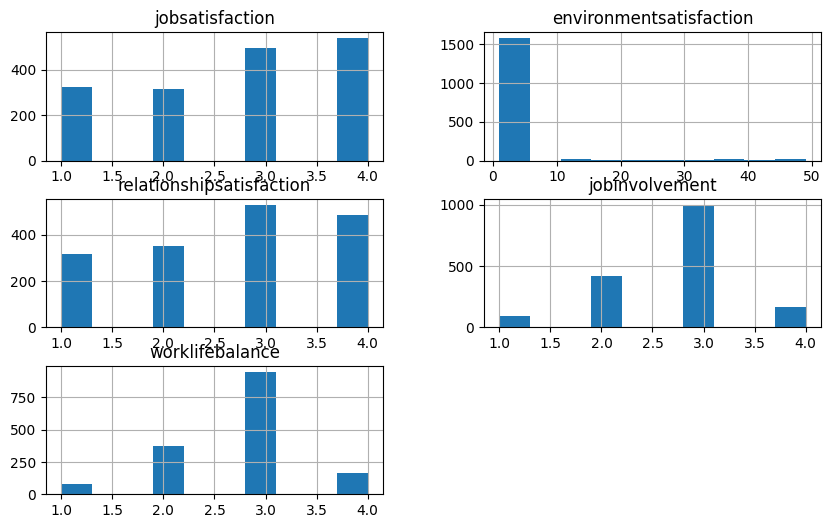

In [10]:
df_datos_abc[cols].describe()
df_datos_abc[cols].hist(figsize=(10, 6))


In [11]:
# Verificar as colunas envolvidas na correlação
cols_to_check = [
    'jobsatisfaction',
    'environmentsatisfaction',
    'relationshipsatisfaction',
    'jobinvolvement',
    'worklifebalance'
]

# Substituir vírgulas por ponto e converter para float
for col in cols_to_check:
    df_datos_abc[col] = df_datos_abc[col].astype(str).str.replace(',', '.')
    df_datos_abc[col] = pd.to_numeric(df_datos_abc[col], errors='coerce')

# Calcular a matriz de correlação
correlation_matrix = df_datos_abc[cols_to_check].corr()
correlation_matrix

,jobsatisfaction,environmentsatisfaction,relationshipsatisfaction,jobinvolvement,worklifebalance
jobsatisfaction,1.000000,0.027224,-0.014094,-0.018025,-0.031531
environmentsatisfaction,0.027224,1.000000,-0.010165,-0.029163,-0.021594
relationshipsatisfaction,-0.014094,-0.010165,1.000000,0.033130,0.017063
jobinvolvement,-0.018025,-0.029163,0.033130,1.000000,-0.013494
worklifebalance,-0.031531,-0.021594,0.017063,-0.013494,1.000000


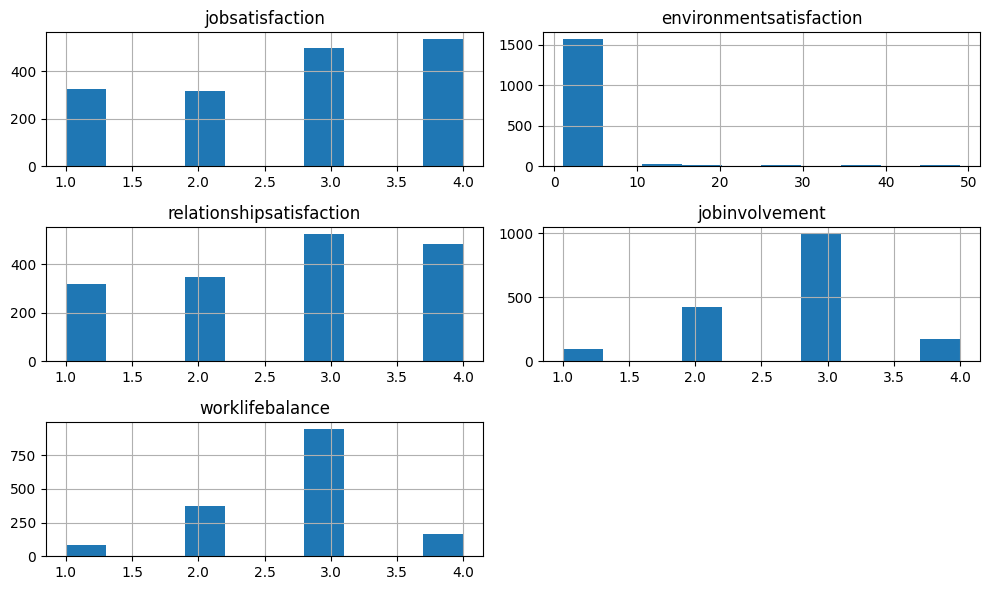

In [12]:
import matplotlib.pyplot as plt

df_datos_abc[cols_to_check].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()


In [4]:
# use years pq tiene datos

df_datos_abc[['yearsatcompany', 'yearssincelastpromotion', 'jobsatisfaction']].corr()


,yearsatcompany,yearssincelastpromotion,jobsatisfaction
yearsatcompany,1.000000,0.615395,-0.011214
yearssincelastpromotion,0.615395,1.000000,-0.020727
jobsatisfaction,-0.011214,-0.020727,1.000000


| Correlación                                    | Valor      | Interpretación                                                                                                        |
| ---------------------------------------------- | ---------- | --------------------------------------------------------------------------------------------------------------------- |
| `yearsatcompany` vs `jobsatisfaction`          | **-0.011** | Correlación negativa **casi nula**: el tiempo en la empresa **no influye** en la satisfacción laboral                 |
| `yearssincelastpromotion` vs `jobsatisfaction` | **-0.021** | También negativa e **insignificante**: haber sido promovido recientemente **no impacta directamente** la satisfacción |
| `yearsatcompany` vs `yearssincelastpromotion`  | **0.615**  | Correlación **fuerte y positiva**: cuanto más tiempo en la empresa, más tiempo desde la última promoción — lógico.    |



# Borradores ⬇️

In [55]:
# relacionamiento interpersonal

df_morado['stockoptionlevel'].unique()
# valores unicos

sorted(df_morado['stockoptionlevel'].unique())
# valores unicos en orden


[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

In [56]:
# Stock option

df_morado['relationshipsatisfaction'].unique()
# valores unicos

sorted(df_morado['relationshipsatisfaction'].unique())
# valores unicos en orden

[np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

In [ ]:
# Columns directamente relacionados con el objetivo del trabajo:
""" JobSatisfaction — satisfacción general con el trabajo
EnvironmentSatisfaction — satisfacción con el entorno laboral
RelationshipSatisfaction — satisfacción con las relaciones interpersonales en el trabajo
WorkLifeBalance — equilibrio entre la vida personal y profesional
JobInvolvement — grado de implicación o compromiso con el trabajo
 """

# Attrition — indica se o funcionário deixou a empresa ("Yes" ou "No")
# Quais características estão mais associadas à saída dos funcionários?


In [39]:
df_morado['standardhours'].value_counts()

standardhours
Part Time    927
Full Time    400
Name: count, dtype: int64

In [40]:
df_morado['stockoptionlevel'].value_counts()

stockoptionlevel
0    719
1    689
2    177
3     93
Name: count, dtype: int64

In [51]:
df_morado['over18'].value_counts()

over18
Y    740
Name: count, dtype: int64

In [36]:
df_morado['overtime'].value_counts()

overtime
No     714
Yes    268
Name: count, dtype: int64

In [ ]:
# Columnas irrelevantes o redundantes (para el análisis inicial)
""" 

  'over18',
    'employeecount',
    'standardhours',
    'employeenumber',
    'sameasmonthlyincome',
    'datebirth',
    'salary',
    'roledepartament''"""

In [ ]:
df_datos_abc[['overtime', 'worklifebalance','standardhours']]


# Saber si PT o FT estan haciendo overtime 
# Saber como es percebido worklife balance en PT y FT


,overtime,worklifebalance,standardhours
0,No,"3,0",Full Time
1,NaN,"3,0",NaN
2,No,NaN,NaN
3,NaN,NaN,Full Time
4,No,"3,0",NaN
...,...,...,...
1673,NaN,"3,0",NaN
1674,No,"3,0",Full Time
1675,No,"3,0",Part Time
1676,Yes,"3,0",Part Time


In [64]:
df_datos_abc[['performancerating', 'trainingtimeslastyear']]

,performancerating,trainingtimeslastyear
0,"3,0",5
1,"3,0",5
2,"3,0",3
3,"3,0",2
4,"3,0",5
...,...,...
1673,"3,0",2
1674,"3,0",2
1675,"3,0",1
1676,NaN,4


In [100]:
import pandas as pd

def valores_unicos_por_coluna(df):
    """
    Retorna um DataFrame com os valores únicos de cada coluna do DataFrame original.

    Parâmetros:
    df (pd.DataFrame): DataFrame de entrada.

    Retorna:
    pd.DataFrame: Cada coluna contém os valores únicos correspondentes à coluna original.
    """
    valores_unicos = {
        col: df[col].dropna().unique().tolist()
        for col in df.columns
    }

    return pd.DataFrame(dict([(col, pd.Series(valores)) for col, valores in valores_unicos.items()]))


In [150]:
valores_unicos_por_coluna(df_datos_abc.head())

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,travel_rarely,2015.722222,Research & Development,6,3.0,Life Sciences,1.0,1,1.0,0.0,NaN,3.0,5.0,resEArch DIREcToR,3.0,Married,"16280,83$","42330,17$",7,Y,No,13,"3,0",3.0,Full Time,0.0,"34,0",5.0,"3,0",20.0,NaN,15.0,15.0,"16280,83$",1972,"195370,00$",ManaGER - Research & Development,NaN,Yes
1,52,NaN,NaN,2063.388889,NaN,1,4.0,Technical Degree,NaN,2,3.0,1.0,NaN,2.0,4.0,ManAGeR,4.0,Divorced,"14307,50$","43331,17$",0,NaN,NaN,14,NaN,1.0,NaN,1.0,"22,0",3.0,NaN,33.0,NaN,11.0,9.0,"14307,50$",1971,"199990,00$",NaN,NaN,1
2,42,NaN,NaN,1984.253968,NaN,4,2.0,Medical,NaN,3,NaN,NaN,NaN,4.0,NaN,ManaGER,1.0,NaN,"12783,92$","41669,33$",1,NaN,NaN,11,NaN,4.0,NaN,2.0,NaN,2.0,NaN,22.0,NaN,5.0,6.0,"12783,92$",1981,"192320,00$",NaN,NaN,False
3,47,NaN,NaN,1771.404762,NaN,2,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,ReseArCH DIrECtOr,NaN,NaN,NaN,"37199,50$",3,NaN,NaN,19,NaN,2.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,2.0,8.0,NaN,1976,"171690,00$",NaN,NaN,0
4,46,NaN,NaN,1582.771346,NaN,3,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,sAleS EXECUtIve,NaN,NaN,NaN,"33238,20$",2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1977,NaN,NaN,NaN,NaN


In [59]:
# Reimportar bibliotecas e recarregar o CSV após o reset
import pandas as pd

# Recarregar o arquivo
df = pd.read_csv("hr_raw_data.csv")

# Lista de colunas selecionadas
colunas_selecionadas = [
    "over18", "overtime", "percentsalaryhike", "performancerating",
    "relationshipsatisfaction", "standardhours", "stockoptionlevel",
    "totalworkingyears", "trainingtimeslastyear", "worklifebalance"
]

In [118]:
# Obter os valores únicos da coluna "percentsalaryhike" em ordem crescente
valores_unicos_ordenados = sorted(df["trainingtimeslastyear"].dropna().unique())
valores_unicos_ordenados

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6)]

In [154]:
df_datos_abc["totalworkingyears"].min()


np.float64(0.0)

In [155]:
df_datos_abc["totalworkingyears"].max()


np.float64(40.0)

In [157]:
df_datos_abc["totalworkingyears"].median()

np.float64(10.0)

In [158]:
df_datos_abc["trainingtimeslastyear"].min()

np.int64(0)

In [159]:
df_datos_abc["trainingtimeslastyear"].max()

np.int64(6)

In [160]:
df_datos_abc["trainingtimeslastyear"].mean()

np.float64(2.795589988081049)

In [162]:
df_datos_abc["worklifebalance"] = df_datos_abc["worklifebalance"].astype(str).str.replace(",", ".")
df_datos_abc["worklifebalance"] = pd.to_numeric(df_datos_abc["worklifebalance"], errors="coerce")


In [166]:
df_datos_abc["worklifebalance"].min()

np.float64(1.0)

In [165]:
df_datos_abc["worklifebalance"].max()


np.float64(4.0)

In [168]:
df_datos_abc["worklifebalance"].unique()

array([ 3., nan,  2.,  4.,  1.])

In [146]:
# exemplo para convertir muitos
cols = [
    'unemployment rate', 'total tax rate', 'tax revenue',
    'population: labor force participation', 'out of pocket health expenditure',
    'gross tertiary education enrollment', 'gross primary education enrollment',
    'forested area', 'cpi change', 'agricultural land'
]
# unidos[cols] = unidos[cols].replace('%', '', regex=True).apply(pd.to_numeric)

In [177]:
# Obter os valores únicos da coluna "totalworkingyears"
valores_unicos_totalworkingyears = df_datos_abc["totalworkingyears"].dropna().unique()

# Ordenar os valores
valores_unicos_totalworkingyears.sort()


valores_unicos_totalworkingyears

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       40.])

In [180]:
# Lista de colunas específicas
colunas_interesse = [
    "over18", "overtime", "percentsalaryhike", "performancerating",
    "relationshipsatisfaction", "standardhours", "stockoptionlevel",
    "totalworkingyears", "trainingtimeslastyear", "worklifebalance"
]

# Calcular o percentual de nulos (%NULL) para essas colunas
percentual_nulos = df_datos_abc[colunas_interesse].isnull().mean() * 100

# Organizar o resultado em DataFrame
percentual_nulos_df = percentual_nulos.reset_index()
percentual_nulos_df.columns = ["coluna", "% de nulos"]
percentual_nulos_df = percentual_nulos_df.sort_values(by="% de nulos", ascending=False)
percentual_nulos_df["% de nulos"] = percentual_nulos_df["% de nulos"].round(2)

percentual_nulos


over18                      55.899881
overtime                    41.477950
percentsalaryhike            0.000000
performancerating           11.918951
relationshipsatisfaction     0.000000
standardhours               20.917759
stockoptionlevel             0.000000
totalworkingyears           32.717521
trainingtimeslastyear        0.000000
worklifebalance              6.793802
dtype: float64

In [183]:
# Lista das colunas de interesse
colunas_interesse = [
    "over18", "overtime", "percentsalaryhike", "performancerating",
    "relationshipsatisfaction", "standardhours", "stockoptionlevel",
    "totalworkingyears", "trainingtimeslastyear", "worklifebalance"
]

# Diagnóstico: tipos reais dos valores dentro de cada coluna
tipos_valores = {}

for col in colunas_interesse:
    tipos_valores[col] = df_datos_abc[col].dropna().apply(type).value_counts()

# Transformar em um DataFrame organizado para visualização
tipos_df = pd.DataFrame.from_dict(tipos_valores, orient="index").fillna(0).astype(int)

tipos_df

,<class 'str'>,<class 'int'>,<class 'float'>
over18,740,0,0
overtime,982,0,0
performancerating,1478,0,0
standardhours,1327,0,0
percentsalaryhike,0,1678,0
relationshipsatisfaction,0,1678,0
stockoptionlevel,0,1678,0
trainingtimeslastyear,0,1678,0
totalworkingyears,0,0,1129
worklifebalance,0,0,1564


In [ ]:
# Calcular el porcentaje de nulos que tenemos para cada columna

porc_nulos = (df_datos_abc.isnull().sum() / df_datos_abc.shape[0]) * 100
porc_nulos

age                           0.000000
attrition                     0.000000
businesstravel               47.735399
dailyrate                     0.000000
department                   81.406436
distancefromhome              0.000000
education                     0.000000
educationfield               46.126341
employeecount                 0.000000
employeenumber                0.000000
environmentsatisfaction       0.000000
gender                        0.000000
hourlyrate                   75.506555
jobinvolvement                0.000000
joblevel                      0.000000
jobrole                       0.000000
jobsatisfaction               0.000000
maritalstatus                40.226460
monthlyincome                29.141836
monthlyrate                   0.000000
numcompaniesworked            0.000000
over18                       55.899881
overtime                     41.477950
percentsalaryhike             0.000000
performancerating            11.918951
relationshipsatisfaction 

In [4]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
businesstravel,47.735399
department,81.406436
educationfield,46.126341
hourlyrate,75.506555
maritalstatus,40.226460
monthlyincome,29.141836
over18,55.899881
overtime,41.477950
performancerating,11.918951
standardhours,20.917759
